## Example Usage of Data Backends

This notebook presents some examples of using the various data backends to produce mock data of different types with various statistical properties.

In [1]:
from mock_data.backends import (
    WeightedDiscrete,
    BoundedNumerical,
    BoundedDatetime,
    LoremIpsumText,
)
import matplotlib.pyplot as plt
import pandas as pd

### Normal distribution between 0 and 10

(array([  4.,   5.,  24.,  63., 120., 216., 340., 481., 572., 679., 722.,
        604., 456., 312., 213.,  98.,  49.,  25.,  11.,   6.]),
 array([0.3230021 , 0.79224477, 1.26148745, 1.73073013, 2.19997281,
        2.66921549, 3.13845817, 3.60770085, 4.07694353, 4.5461862 ,
        5.01542888, 5.48467156, 5.95391424, 6.42315692, 6.8923996 ,
        7.36164228, 7.83088496, 8.30012764, 8.76937031, 9.23861299,
        9.70785567]),
 <BarContainer object of 20 artists>)

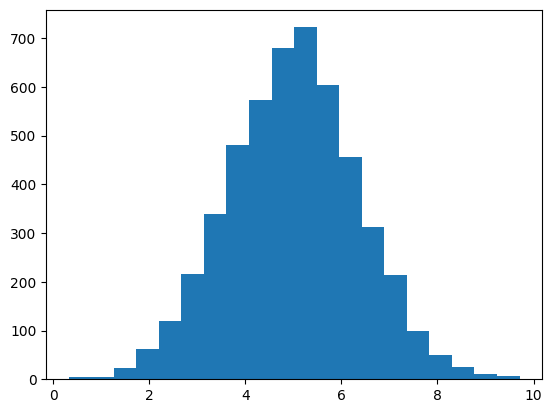

In [2]:
cr = BoundedNumerical(distribution="norm", lower_bound=0, upper_bound=10)
cr_samples = cr.generate_samples(size=5000)

plt.hist(cr_samples, bins=20)

In [3]:
from scipy.stats import kstest, norm, pearsonr
import numpy as np

In [4]:
# this is similar to a Shapiro-Wilk test
other_normal_samples = np.sort(norm.rvs(size=5000) - 43 )
pearsonr(np.sort(cr_samples), other_normal_samples)

PearsonRResult(statistic=0.9997257642561116, pvalue=0.0)

In [5]:
type(other_normal_samples)

numpy.ndarray

### Chi2 Distribution between -8 and 100 with 3 degrees of freedom

(array([8.980e+02, 1.018e+03, 8.590e+02, 6.760e+02, 4.580e+02, 3.470e+02,
        2.500e+02, 1.870e+02, 1.110e+02, 7.300e+01, 3.600e+01, 3.200e+01,
        2.100e+01, 8.000e+00, 9.000e+00, 7.000e+00, 4.000e+00, 1.000e+00,
        3.000e+00, 2.000e+00]),
 array([-7.98438093, -3.38723238,  1.20991617,  5.80706472, 10.40421326,
        15.00136181, 19.59851036, 24.19565891, 28.79280745, 33.389956  ,
        37.98710455, 42.58425309, 47.18140164, 51.77855019, 56.37569874,
        60.97284728, 65.56999583, 70.16714438, 74.76429293, 79.36144147,
        83.95859002]),
 <BarContainer object of 20 artists>)

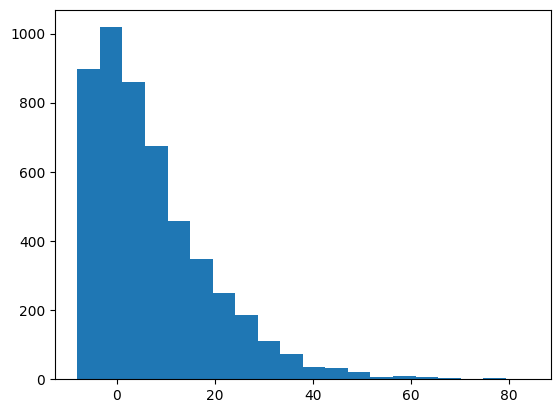

In [6]:
chi_squared = BoundedNumerical(
    distribution="chi2", lower_bound=-8, upper_bound=100, df=3
)
chi_squared_samples = chi_squared.generate_samples(size=5000)

plt.hist(chi_squared_samples, bins=20)

### Sample of Dates between 20200101 and 20201231 following an Arcsine distribution

This distribution is described [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.arcsine.html#scipy.stats.arcsine) and can be used to achieve high sampling frequency at both ends of the range. 

<Axes: >

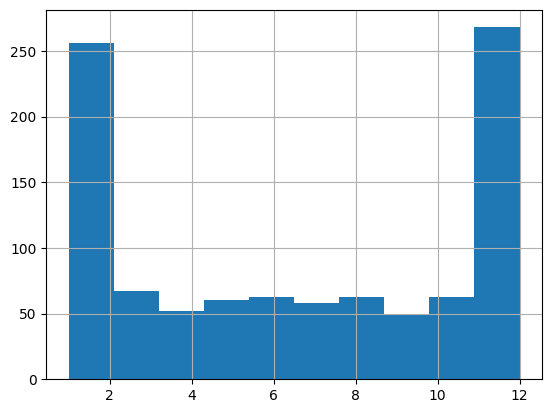

In [7]:
date_sampler = BoundedDatetime(
    min_datetime="20200101", max_datetime="20201231", distribution="arcsine"
)
sampled_dates = date_sampler.generate_samples(size=1000)

# convert to a Pandas series and plot the frequency of months
pd.Series(pd.to_datetime(sampled_dates, format="%Y%m%d")).dt.month.hist()

### Lorem Ipsum text with length following a uniform distribution and 50% chance of being blank.

The resultant distribution is interesting because approximately 50% of the samples have length 0 while the remainder are sampled from a uniform distribution between 50 and 500 characters in length.

(array([521.,   0.,  28.,  28.,  24.,  30.,  26.,  19.,  28.,  25.,  25.,
         30.,  38.,  27.,  23.,  30.,  32.,  24.,  18.,  24.]),
 array([  0. ,  24.9,  49.8,  74.7,  99.6, 124.5, 149.4, 174.3, 199.2,
        224.1, 249. , 273.9, 298.8, 323.7, 348.6, 373.5, 398.4, 423.3,
        448.2, 473.1, 498. ]),
 <BarContainer object of 20 artists>)

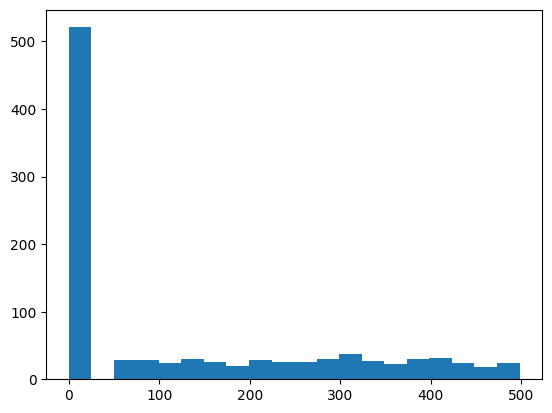

In [8]:
lorem = LoremIpsumText(lower_bound=50, upper_bound=500, blank_probability=0.5)
text_samples = lorem.generate_samples(size=1000)

sample_lengths = [len(text_sample) for text_sample in text_samples]

plt.hist(sample_lengths, bins=20)

### Utilize WeightedDiscrete to sample days of week with particular frequency

We want Monday to be much more common than the other days. Here's how we could accomplish this. 

<Axes: >

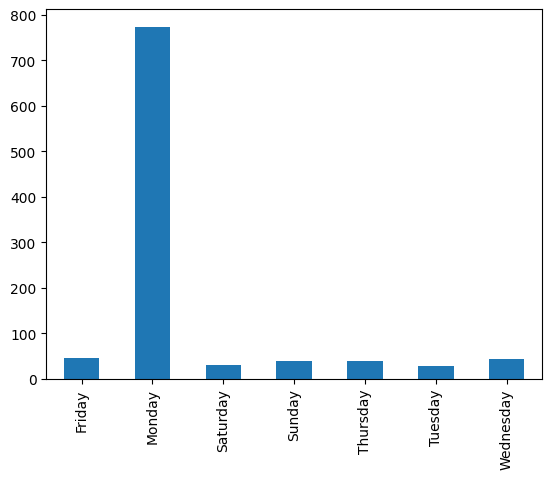

In [9]:
weekday_sampler = WeightedDiscrete(
    {
        "Monday": 20,
        "Tuesday": 1,
        "Wednesday": 1,
        "Thursday": 1,
        "Friday": 1,
        "Saturday": 1,
        "Sunday": 1,
    }
)

sampled_days = pd.Series(weekday_sampler.generate_samples(size=1000))

sampled_days.groupby(sampled_days).count().plot(kind="bar")